<a href="https://colab.research.google.com/github/ffalo64/rabbit_challenge/blob/main/2_11_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# モジュールのロード

In [1]:
import tensorflow as tf
import numpy as np

# データのロード

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train.reshape(len(y_train)), depth=10)
y_test = tf.one_hot(y_test.reshape(len(y_test)), depth=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 21s 0us/step
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [3]:
index2label = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

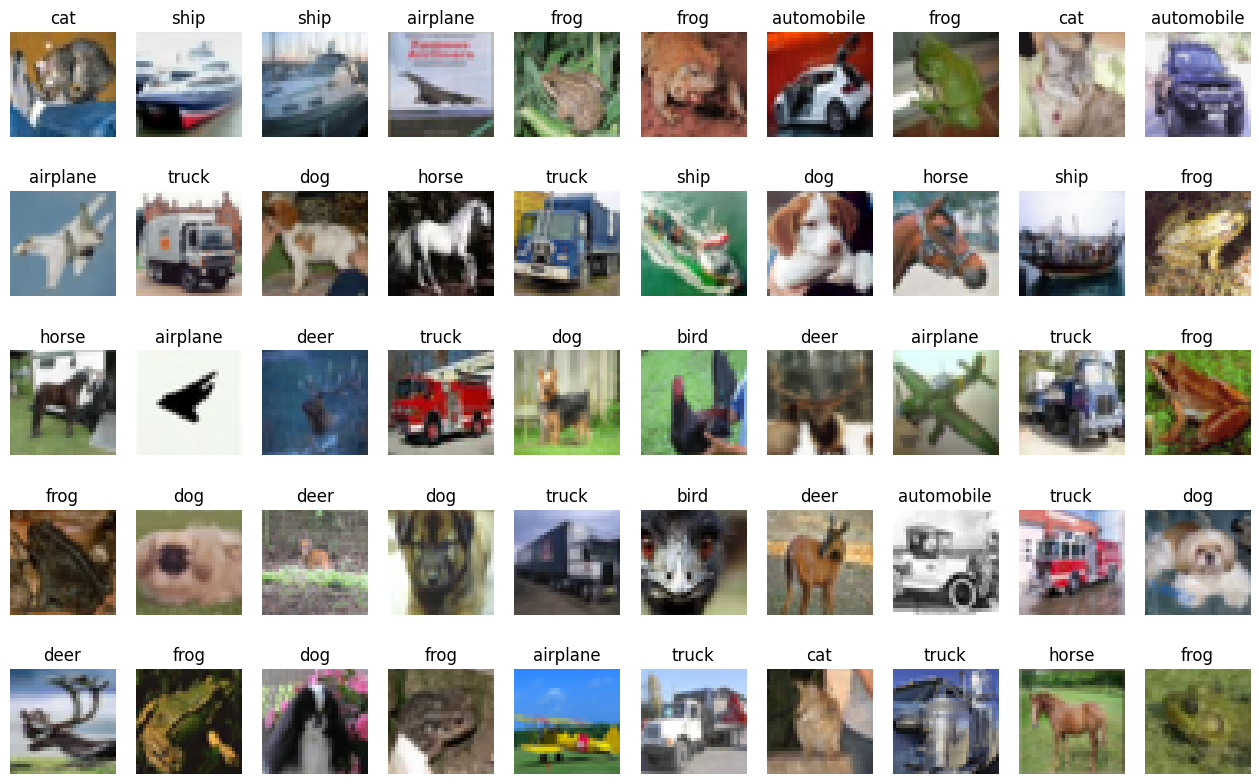

In [4]:
import matplotlib.pyplot as plt
import random

index = 0
count = 50

plt.figure(figsize=(16, 10))

for i, img in enumerate(x_test[index:index+count]):
    plt.subplot(5, 10, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(index2label[np.argmax(y_test[i])])

plt.show()

# ベースモデルでの実行(Dropoutなし)

In [5]:
epochs = 5
batch_size = 256

In [6]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [7]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [8]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 13s 16ms/step - loss: 1.4653 - acc: 0.4744 - val_loss: 1.2152 - val_acc: 0.5779
Epoch 2/5
196/196 [==============================] - 3s 13ms/step - loss: 1.0860 - acc: 0.6204 - val_loss: 1.0050 - val_acc: 0.6498
Epoch 3/5
196/196 [==============================] - 2s 12ms/step - loss: 0.9209 - acc: 0.6811 - val_loss: 0.9576 - val_acc: 0.6657
Epoch 4/5
196/196 [==============================] - 3s 14ms/step - loss: 0.8000 - acc: 0.7207 - val_loss: 0.9313 - val_acc: 0.6749
Epoch 5/5
196/196 [==============================] - 3s 14ms/step - loss: 0.6823 - acc: 0.7659 - val_loss: 0.9187 - val_acc: 0.6847


# Dropoutあり

In [9]:
def create_model(input_shape, class_num):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(class_num, activation='softmax'),
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [10]:
model = create_model(x_train.shape, 10)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                      

In [11]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)

Epoch 1/5
196/196 [==============================] - 4s 15ms/step - loss: 1.5795 - acc: 0.4340 - val_loss: 1.2615 - val_acc: 0.5520
Epoch 2/5
196/196 [==============================] - 3s 14ms/step - loss: 1.1868 - acc: 0.5792 - val_loss: 1.1545 - val_acc: 0.6005
Epoch 3/5
196/196 [==============================] - 3s 13ms/step - loss: 1.0281 - acc: 0.6398 - val_loss: 0.9964 - val_acc: 0.6424
Epoch 4/5
196/196 [==============================] - 2s 13ms/step - loss: 0.9039 - acc: 0.6843 - val_loss: 0.9480 - val_acc: 0.6672
Epoch 5/5
196/196 [==============================] - 2s 12ms/step - loss: 0.8135 - acc: 0.7165 - val_loss: 0.9228 - val_acc: 0.6736


# Dropout有無での比較

Dropout有無での比較です。

In [12]:
def create_model(input_shape, class_num, is_use_dropout, dropout_rate=0.1):
    if is_use_dropout:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dropout(dropout_rate),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])
    else:
        model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=input_shape[1:], activation='relu'),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(class_num, activation='softmax'),
        ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    return model

In [13]:
epochs = 10
batch_size = 256

is_use_dropouts = [
                False,
                True
]

tf.random.set_seed(0) # 再現性を高めるために乱数シードを固定しています。
histories = []
for is_use_dropout in is_use_dropouts:
    model = create_model(x_train.shape, 10, is_use_dropout, 0.3)

    history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, epochs=epochs)
    histories.append(history)

Epoch 1/10
196/196 [==============================] - 5s 16ms/step - loss: 1.4729 - acc: 0.4770 - val_loss: 1.1984 - val_acc: 0.5794
Epoch 2/10
196/196 [==============================] - 3s 13ms/step - loss: 1.0944 - acc: 0.6157 - val_loss: 1.0512 - val_acc: 0.6366
Epoch 3/10
196/196 [==============================] - 3s 13ms/step - loss: 0.9361 - acc: 0.6748 - val_loss: 0.9952 - val_acc: 0.6548
Epoch 4/10
196/196 [==============================] - 3s 13ms/step - loss: 0.8218 - acc: 0.7139 - val_loss: 0.9338 - val_acc: 0.6728
Epoch 5/10
196/196 [==============================] - 3s 14ms/step - loss: 0.7065 - acc: 0.7565 - val_loss: 0.9195 - val_acc: 0.6773
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.6073 - acc: 0.7923 - val_loss: 0.8821 - val_acc: 0.6942
Epoch 7/10
196/196 [==============================] - 3s 13ms/step - loss: 0.5043 - acc: 0.8268 - val_loss: 0.9977 - val_acc: 0.6822
Epoch 8/10
196/196 [==============================] - 2s 13ms/step - 

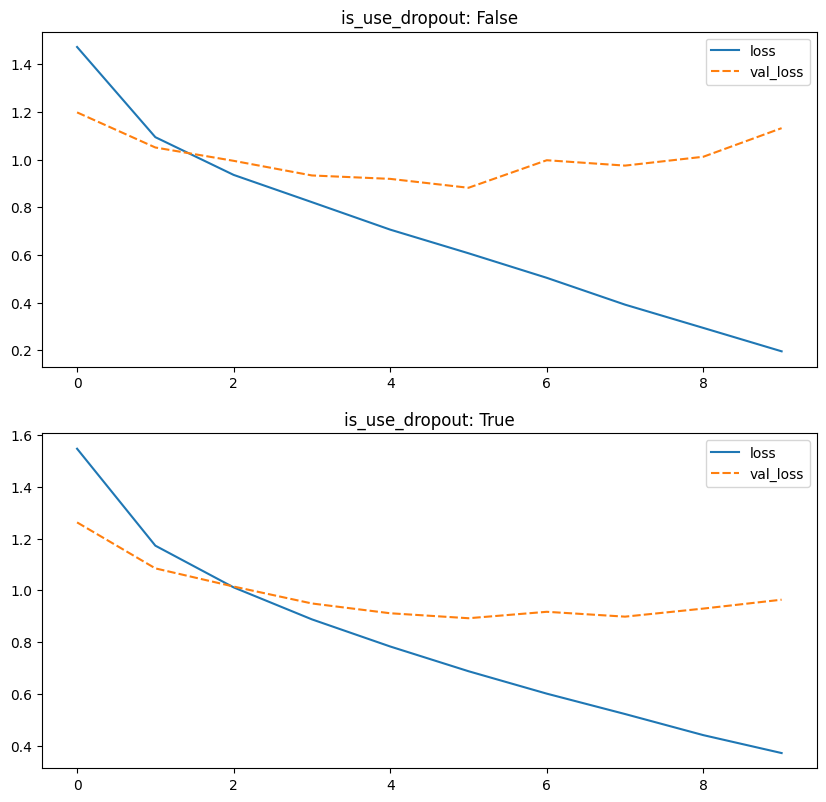

In [14]:
import pandas as pd
import seaborn as sns

fig = plt.figure(figsize=(10, 20))

for i, history in enumerate(histories):
    ax = fig.add_subplot(4, 1, i + 1)
    
    plot_df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    sns.lineplot(data=plot_df, ax=ax)
    ax.set_title(f'is_use_dropout: {is_use_dropouts[i]}')